In [1]:
import os
seed = 10
os.environ['PYTHONHASHSEED']=str(seed)

In [2]:
import requests
import lxml
import datetime as dt
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils import compute_class_weight
import tensorflow as tf
from pil import Image
from sklearn import preprocessing
import tensorflow_addons as tfa

count = 0

In [15]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/ANF_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,21.5000,24.211693,-82.142857,-6805500.0,2.0
2000-01-24,20.2500,23.602201,-92.465753,-8986800.0,1.0
2000-01-25,20.1875,23.076863,-92.307692,-11383100.0,2.0
2000-01-26,20.8750,22.738115,-82.786885,-9392500.0,2.0
2000-01-27,22.8750,22.759174,-56.557377,-6811000.0,2.0


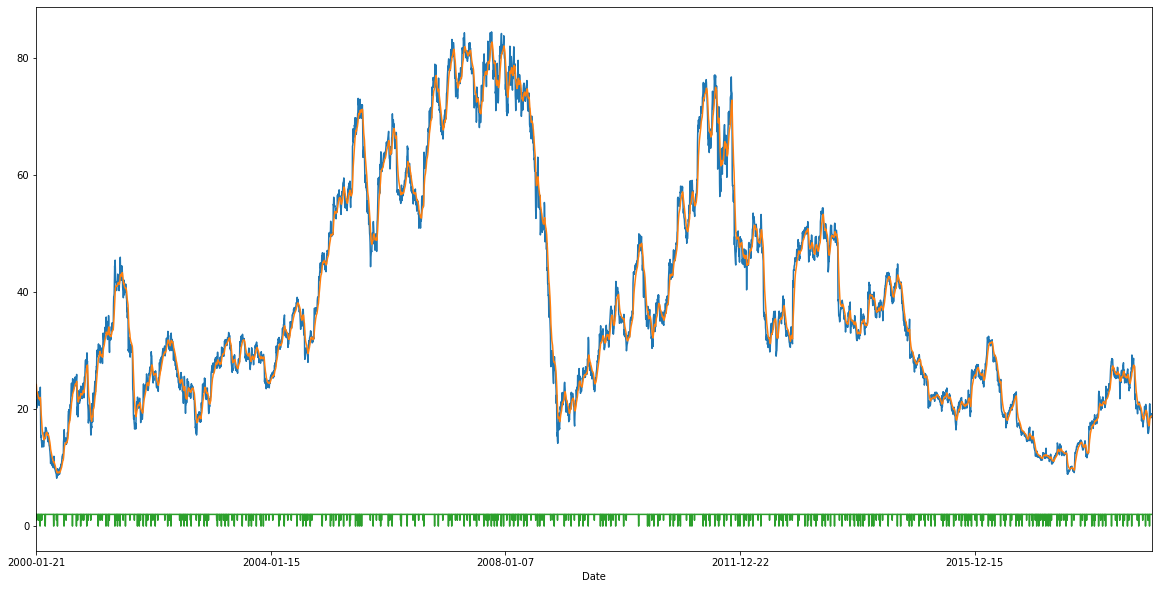

In [16]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

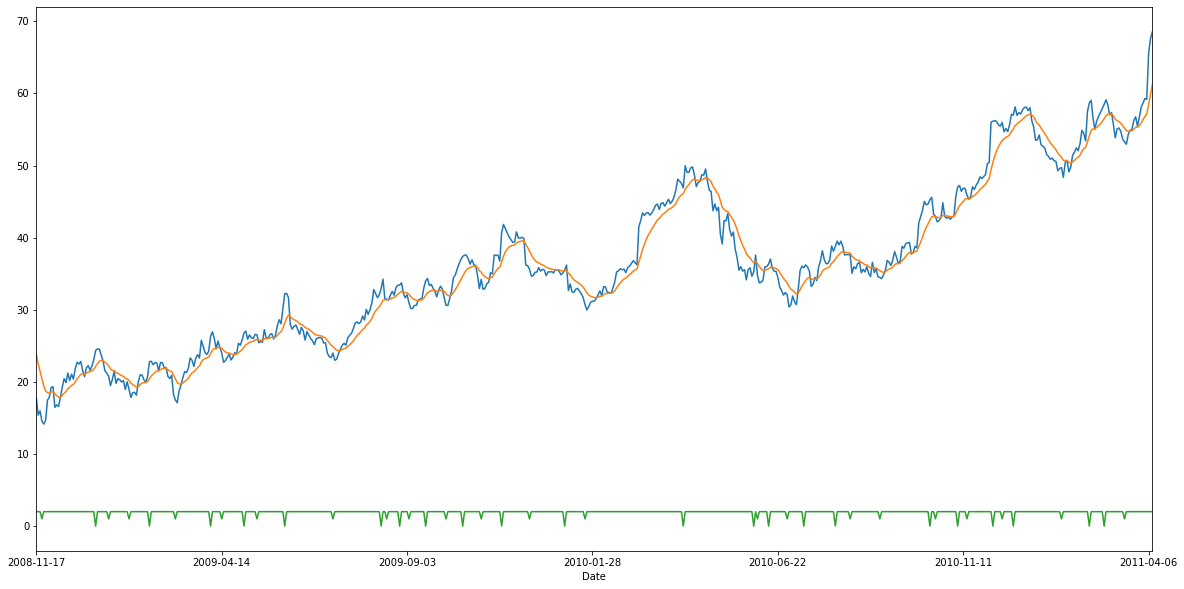

In [17]:
df = df.loc['2008-11-17':'2011-04-10']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [18]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [19]:
acc_df = df
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 2008-11-17 to 2011-04-08
Data columns (total 5 columns):
previous_1d    603 non-null float64
EMA_12         603 non-null float64
willr_14       603 non-null float64
OBV_7          603 non-null float64
labels         603 non-null float64
dtypes: float64(5)
memory usage: 28.3+ KB


In [20]:
seed = 10
df = pd.read_csv("data/cyclic_tickers/initial_indicators/BA_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,46.5000,43.946622,-19.402985,20099500.0,2.0
2000-01-24,45.6875,44.214450,-29.104478,15707000.0,2.0
2000-01-25,44.3125,44.229534,-45.522388,12400800.0,2.0
2000-01-26,45.6875,44.453837,-34.821429,17458000.0,2.0
2000-01-27,46.1875,44.720554,-27.678571,20548100.0,2.0


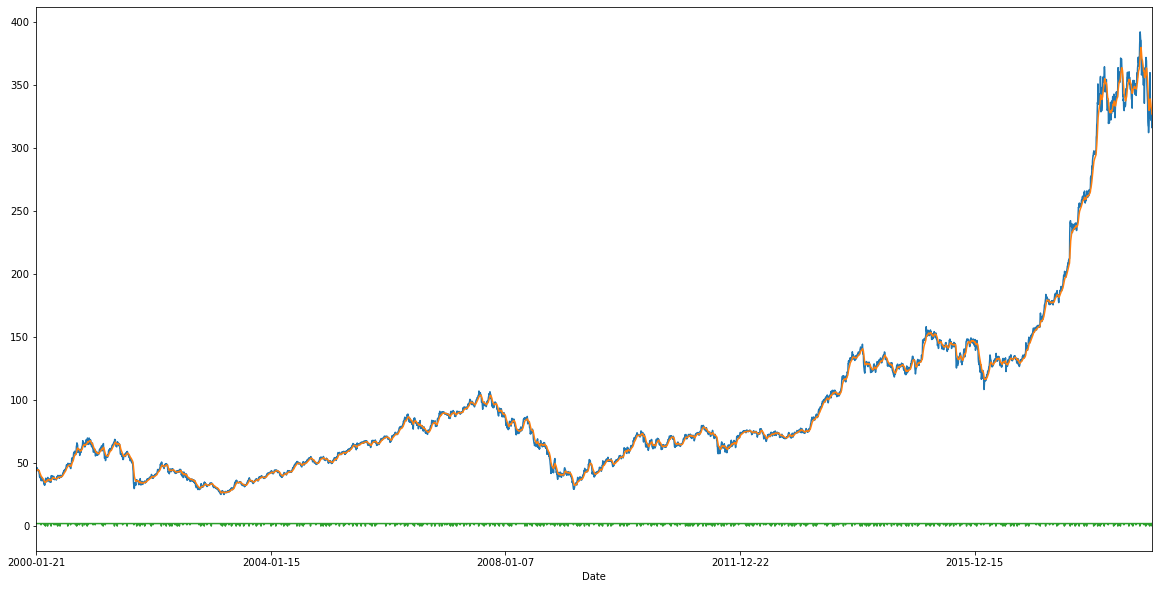

In [21]:
#%matplotlib notebook
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

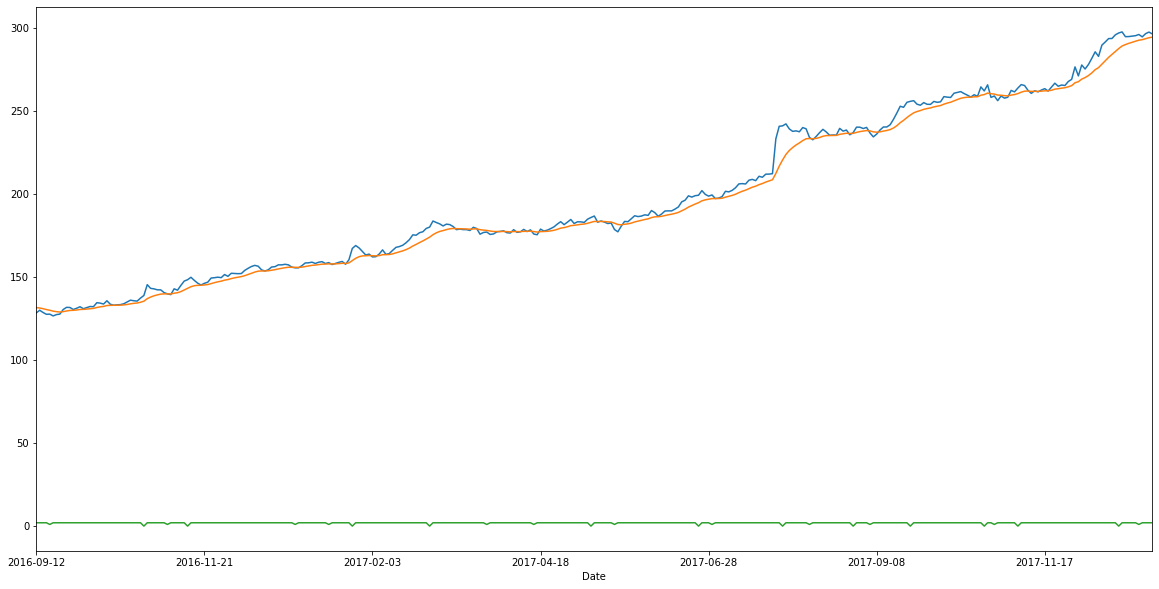

In [22]:
df = df.loc['2016-09-11':'2018-01-07']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [23]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [24]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 2008-11-17 to 2018-01-05
Data columns (total 5 columns):
previous_1d    936 non-null float64
EMA_12         936 non-null float64
willr_14       936 non-null float64
OBV_7          936 non-null float64
labels         936 non-null float64
dtypes: float64(5)
memory usage: 43.9+ KB


In [25]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/600519.SS_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2001-09-14,7.142585,7.257483,-41.873824,204624213.0,2.0
2001-09-17,7.224180,7.252359,-51.296847,208479649.0,2.0
2001-09-18,7.132634,7.233940,-72.964156,203965392.0,2.0
2001-09-19,7.214230,7.230908,-59.609037,209378730.0,2.0
2001-09-20,7.347568,7.248855,-37.785092,213725440.0,2.0


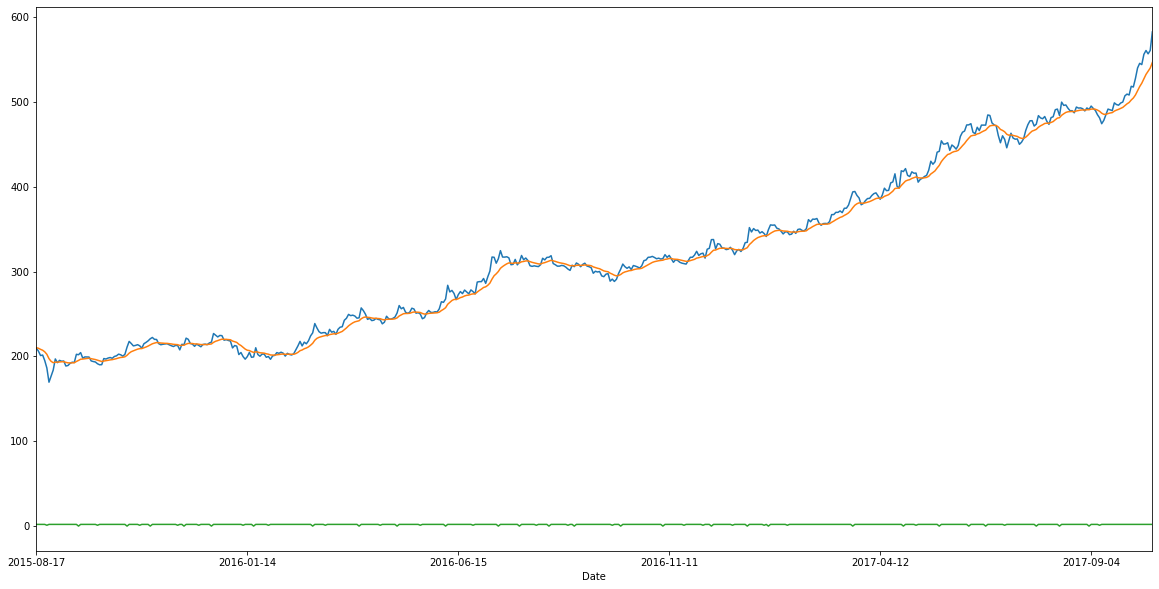

In [26]:
df = df.loc['2015-08-16':'2017-10-22']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [27]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [28]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1466 entries, 2008-11-17 to 2017-10-20
Data columns (total 5 columns):
previous_1d    1466 non-null float64
EMA_12         1466 non-null float64
willr_14       1466 non-null float64
OBV_7          1466 non-null float64
labels         1466 non-null float64
dtypes: float64(5)
memory usage: 68.7+ KB


In [29]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/COST_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,50.0000,47.379245,-27.700831,21139400.0,2.0
2000-01-24,48.5000,47.551669,-40.997230,17619200.0,2.0
2000-01-25,47.0000,47.466797,-54.293629,12613700.0,2.0
2000-01-26,49.6875,47.808444,-30.470914,16344500.0,2.0
2000-01-27,50.4375,48.212914,-27.215190,20127300.0,2.0


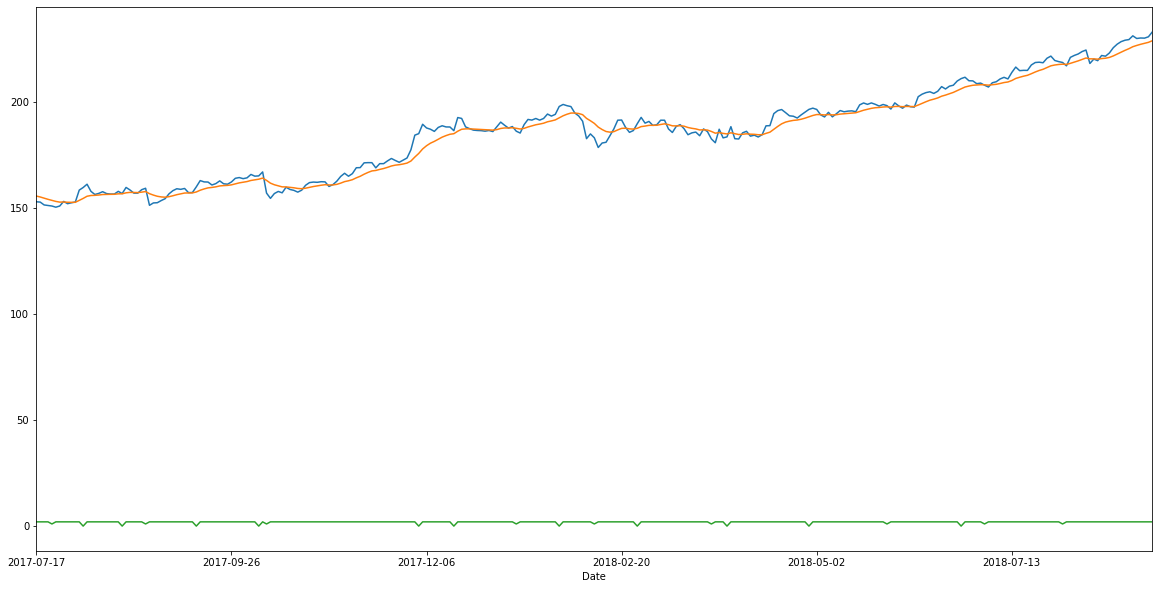

In [30]:
df = df.loc['2017-07-17':'2018-09-04']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [31]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [32]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1753 entries, 2008-11-17 to 2018-09-04
Data columns (total 5 columns):
previous_1d    1753 non-null float64
EMA_12         1753 non-null float64
willr_14       1753 non-null float64
OBV_7          1753 non-null float64
labels         1753 non-null float64
dtypes: float64(5)
memory usage: 82.2+ KB


In [33]:
df = pd.read_csv("data/cyclic_tickers/initial_indicators/JPM_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,49.375000,48.388499,-42.592593,-2894250.0,2.0
2000-01-24,48.625000,48.424884,-39.516144,-8054850.0,2.0
2000-01-25,48.666668,48.462081,-38.709668,-1595700.0,2.0
2000-01-26,49.750000,48.660222,-17.741956,5984250.0,2.0
2000-01-27,52.291668,49.218906,-5.232557,14370900.0,2.0


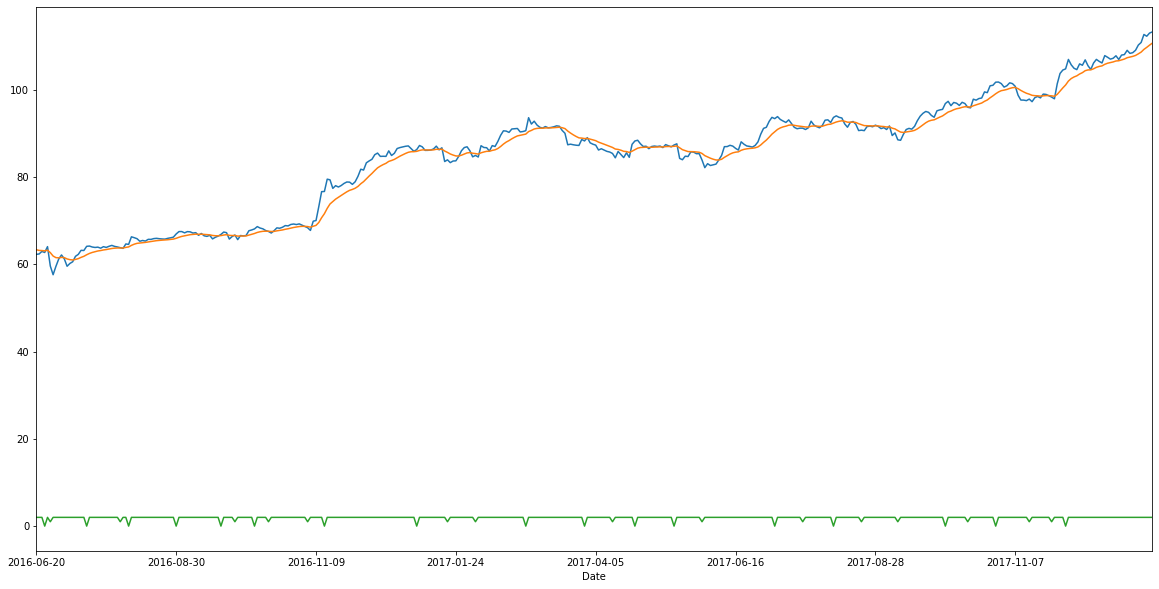

In [34]:
df = df.loc['2016-06-19':'2018-01-21']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [35]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [36]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2153 entries, 2008-11-17 to 2018-01-19
Data columns (total 5 columns):
previous_1d    2153 non-null float64
EMA_12         2153 non-null float64
willr_14       2153 non-null float64
OBV_7          2153 non-null float64
labels         2153 non-null float64
dtypes: float64(5)
memory usage: 100.9+ KB


In [42]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/PG_data_test.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2019-01-22,91.419998,91.455093,-52.848110,-5093000.0,1.0
2019-01-23,90.440002,91.298925,-66.084726,-18611500.0,2.0
2019-01-24,94.839996,91.843705,-21.418921,4257500.0,2.0
2019-01-25,94.300003,92.221597,-28.785813,-7888900.0,2.0
2019-01-28,93.599998,92.433659,-38.335668,-18506900.0,2.0


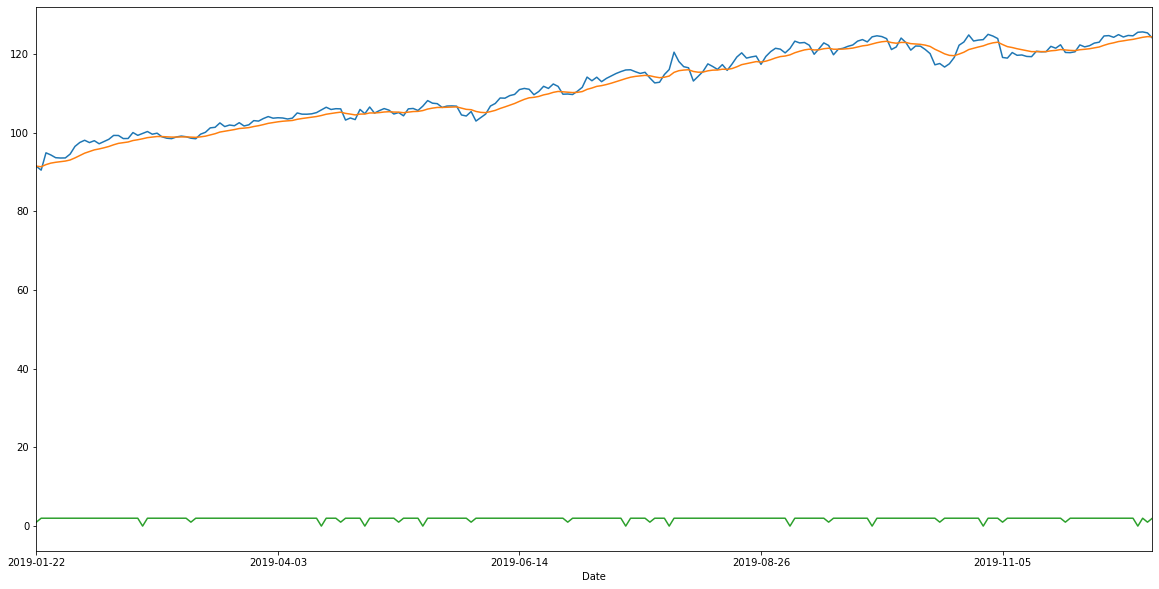

In [43]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [44]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [45]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2385 entries, 2008-11-17 to 2019-12-19
Data columns (total 5 columns):
previous_1d    2385 non-null float64
EMA_12         2385 non-null float64
willr_14       2385 non-null float64
OBV_7          2385 non-null float64
labels         2385 non-null float64
dtypes: float64(5)
memory usage: 111.8+ KB


In [47]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/2319.HK_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2004-06-30,2.575,2.436754,-19.047606,495757896.0,2.0
2004-07-01,2.525,2.450330,-33.333298,480565876.0,2.0
2004-07-02,2.525,2.461818,-33.333298,480565876.0,2.0
2004-07-05,2.550,2.475385,-27.777775,505227876.0,2.0
2004-07-06,2.550,2.486864,-27.777775,505227876.0,2.0


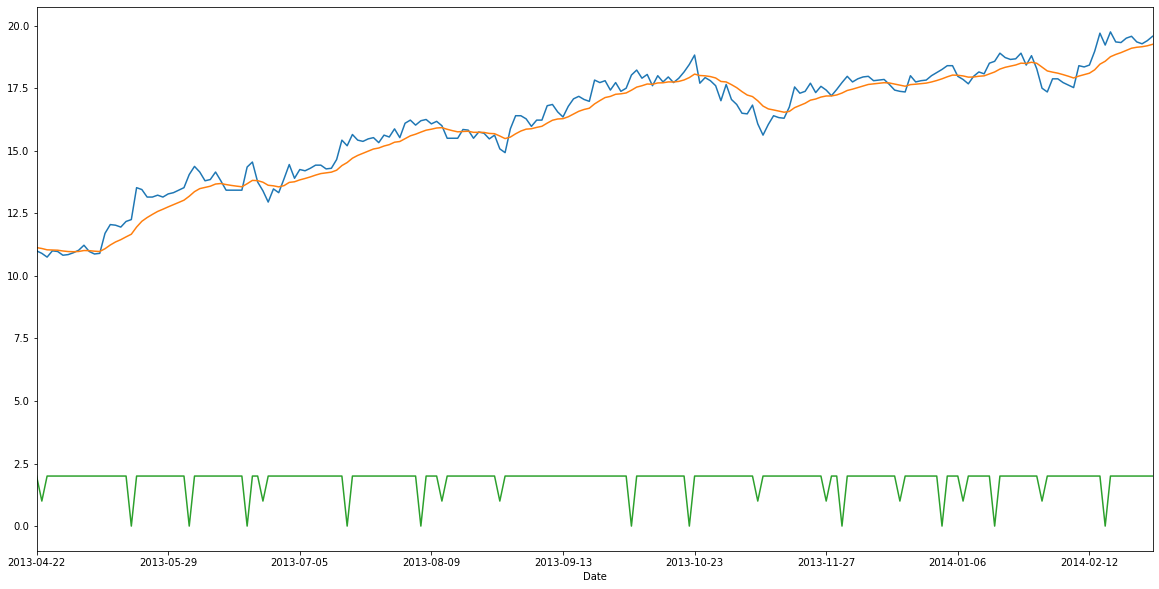

In [48]:
df = df.loc['2013-04-21':'2014-03-02']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [49]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [50]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2598 entries, 2008-11-17 to 2014-02-28
Data columns (total 5 columns):
previous_1d    2598 non-null float64
EMA_12         2598 non-null float64
willr_14       2598 non-null float64
OBV_7          2598 non-null float64
labels         2598 non-null float64
dtypes: float64(5)
memory usage: 121.8+ KB


In [51]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/TGT_data_test2.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2020-01-22,114.040001,121.098552,-98.547847,-39707800.0,2.0
2020-01-23,113.900002,119.991082,-99.140747,-44778400.0,2.0
2020-01-24,115.529999,119.304762,-80.714281,-40136900.0,2.0
2020-01-27,114.320000,118.537875,-90.317449,-44475800.0,2.0
2020-01-28,115.779999,118.113587,-75.552172,-37696600.0,2.0


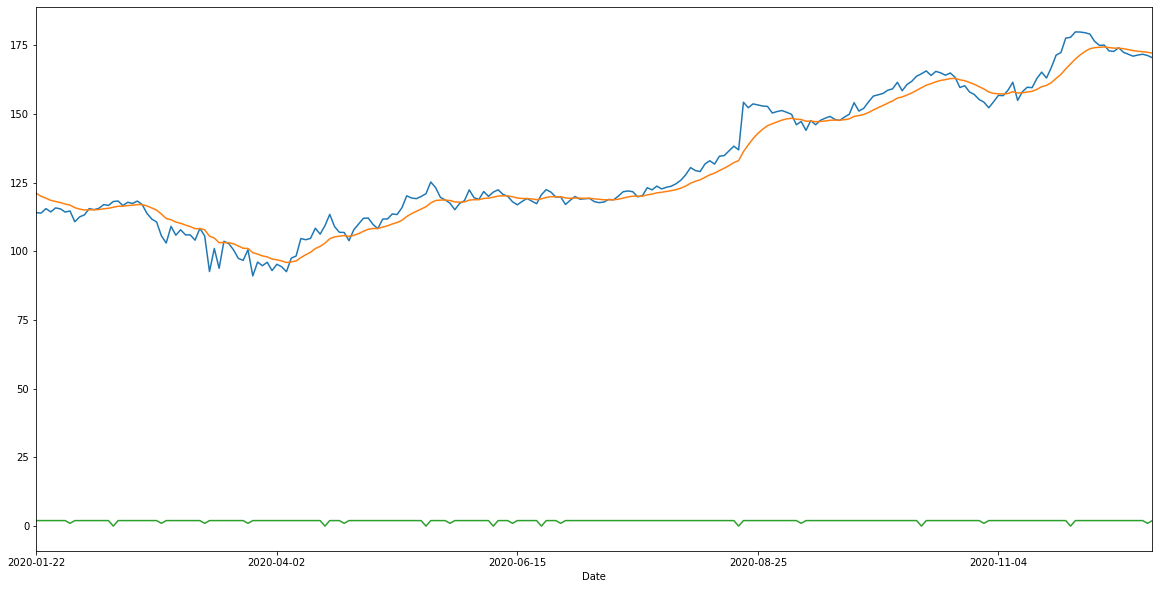

In [52]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [53]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [54]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2831 entries, 2008-11-17 to 2020-12-21
Data columns (total 5 columns):
previous_1d    2831 non-null float64
EMA_12         2831 non-null float64
willr_14       2831 non-null float64
OBV_7          2831 non-null float64
labels         2831 non-null float64
dtypes: float64(5)
memory usage: 132.7+ KB


In [55]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/HD_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,60.8125,62.311914,-90.506329,-32999900.0,2.0
2000-01-24,60.0000,61.956235,-94.230769,-39682800.0,2.0
2000-01-25,58.0000,61.347584,-82.786885,-47022400.0,2.0
2000-01-26,56.1250,60.544109,-85.714286,-57274800.0,2.0
2000-01-27,57.3750,60.056554,-71.428571,-48806400.0,2.0


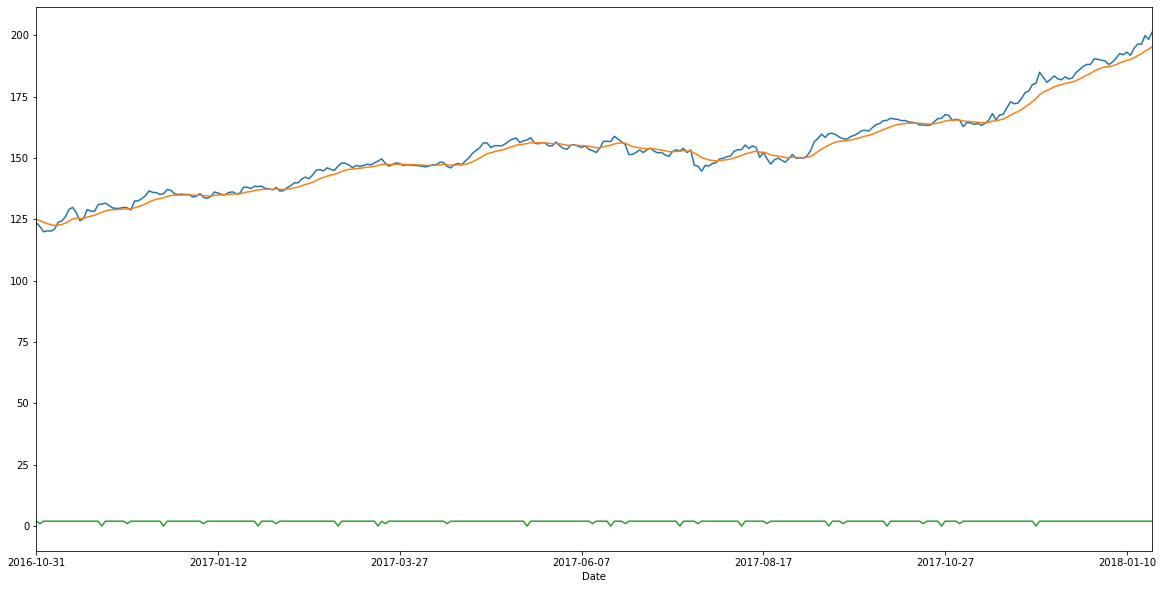

In [56]:
df = df.loc['2016-10-31':'2018-01-22']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [57]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [58]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3139 entries, 2008-11-17 to 2018-01-22
Data columns (total 5 columns):
previous_1d    3139 non-null float64
EMA_12         3139 non-null float64
willr_14       3139 non-null float64
OBV_7          3139 non-null float64
labels         3139 non-null float64
dtypes: float64(5)
memory usage: 147.1+ KB


In [60]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/KO_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,32.93750,30.599729,-0.584795,80376600.0,0.0
2000-01-24,33.43750,31.036309,-0.000000,91762400.0,2.0
2000-01-25,32.43750,31.251877,-17.777778,80456400.0,2.0
2000-01-26,32.93750,31.511203,-9.248555,90175000.0,2.0
2000-01-27,31.53125,31.514288,-36.969697,66451200.0,2.0


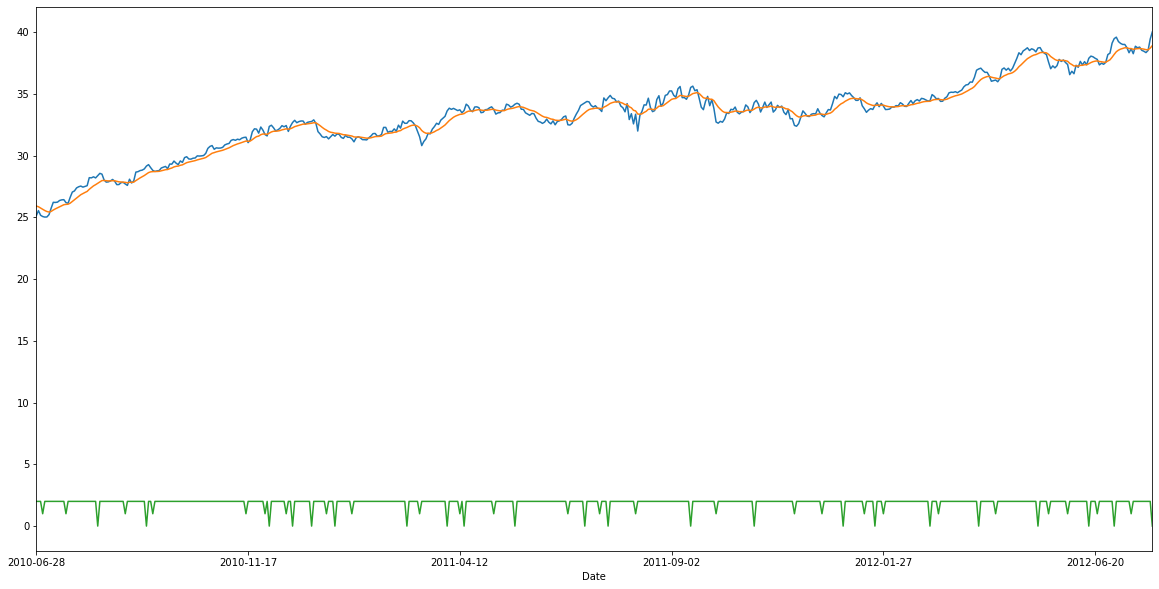

In [61]:
df = df.loc['2010-06-28':'2012-07-30']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [62]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [63]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3667 entries, 2008-11-17 to 2012-07-30
Data columns (total 5 columns):
previous_1d    3667 non-null float64
EMA_12         3667 non-null float64
willr_14       3667 non-null float64
OBV_7          3667 non-null float64
labels         3667 non-null float64
dtypes: float64(5)
memory usage: 171.9+ KB


In [64]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/KO_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,32.93750,30.599729,-0.584795,80376600.0,0.0
2000-01-24,33.43750,31.036309,-0.000000,91762400.0,2.0
2000-01-25,32.43750,31.251877,-17.777778,80456400.0,2.0
2000-01-26,32.93750,31.511203,-9.248555,90175000.0,2.0
2000-01-27,31.53125,31.514288,-36.969697,66451200.0,2.0


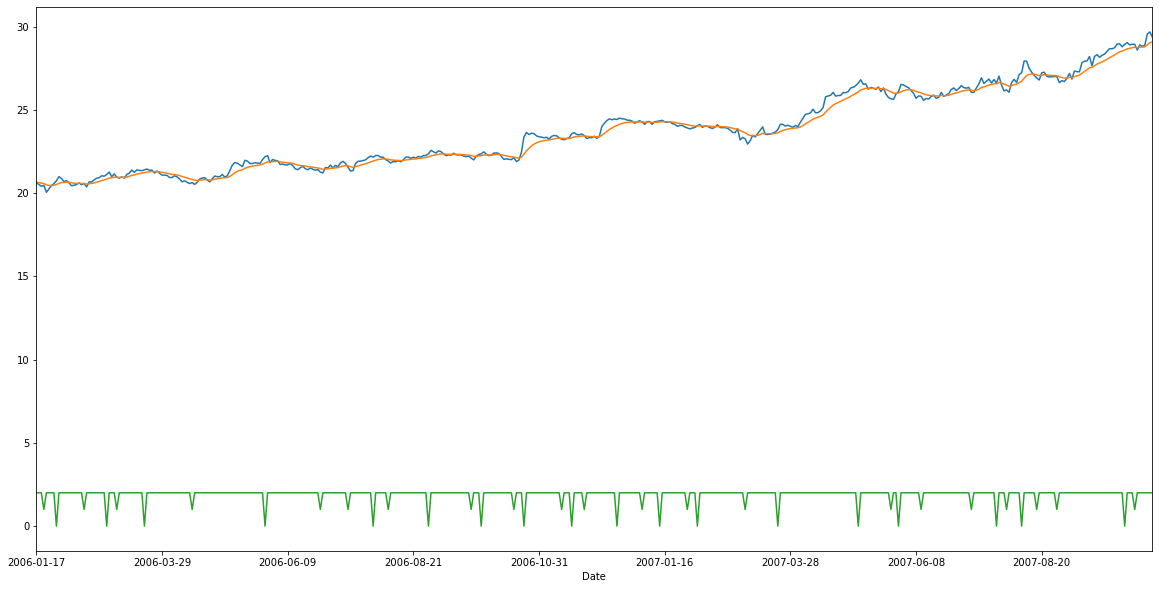

In [65]:
df = df.loc['2006-01-16':'2007-10-22']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [66]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [67]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4112 entries, 2008-11-17 to 2007-10-22
Data columns (total 5 columns):
previous_1d    4112 non-null float64
EMA_12         4112 non-null float64
willr_14       4112 non-null float64
OBV_7          4112 non-null float64
labels         4112 non-null float64
dtypes: float64(5)
memory usage: 192.8+ KB


In [68]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/PEP_data.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2000-01-21,36.1250,36.296197,-60.606061,5362300.0,2.0
2000-01-24,36.1250,36.269859,-60.606061,5362300.0,2.0
2000-01-25,35.3125,36.122573,-80.303030,1577300.0,2.0
2000-01-26,34.3125,35.844100,-90.789474,-2779200.0,2.0
2000-01-27,33.9375,35.550777,-96.153846,-5953300.0,2.0


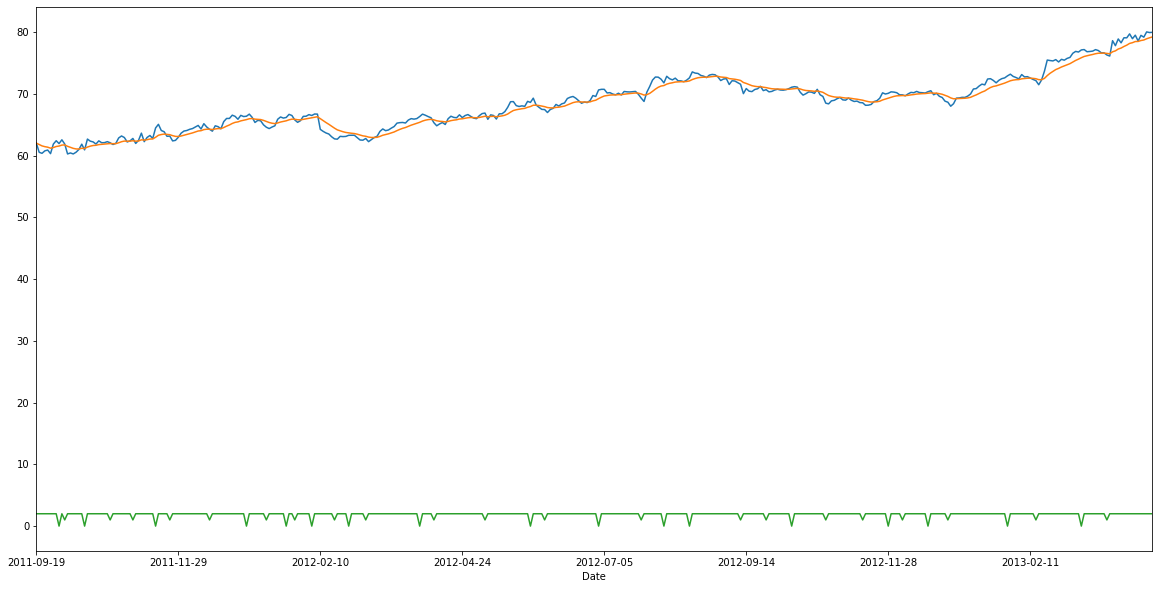

In [69]:
df = df.loc['2011-09-19':'2013-04-15']
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [70]:
df.to_csv('mark up phase data/{}_acc_data.csv'.format(str(count)))
count += 1 

In [71]:
acc_df = pd.concat([acc_df,df])
acc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4506 entries, 2008-11-17 to 2013-04-15
Data columns (total 5 columns):
previous_1d    4506 non-null float64
EMA_12         4506 non-null float64
willr_14       4506 non-null float64
OBV_7          4506 non-null float64
labels         4506 non-null float64
dtypes: float64(5)
memory usage: 211.2+ KB


## Test Set

In [76]:
df = pd.read_csv("data/noncyclic_tickers/initial_indicators/WMT_data_test2.csv")
df.set_index('Date', inplace=True)
df.head()

,previous_1d,EMA_12,willr_14,OBV_7,labels
Date,,,,,
2020-01-22,115.589996,116.459043,-80.074504,-17684500.0,2.0
2020-01-23,116.099998,116.403805,-70.577262,-12758400.0,2.0
2020-01-24,115.809998,116.312450,-69.789236,-17063500.0,2.0
2020-01-27,114.370003,116.013612,-94.416205,-21446900.0,2.0
2020-01-28,115.860001,115.989979,-34.297465,-14428500.0,2.0


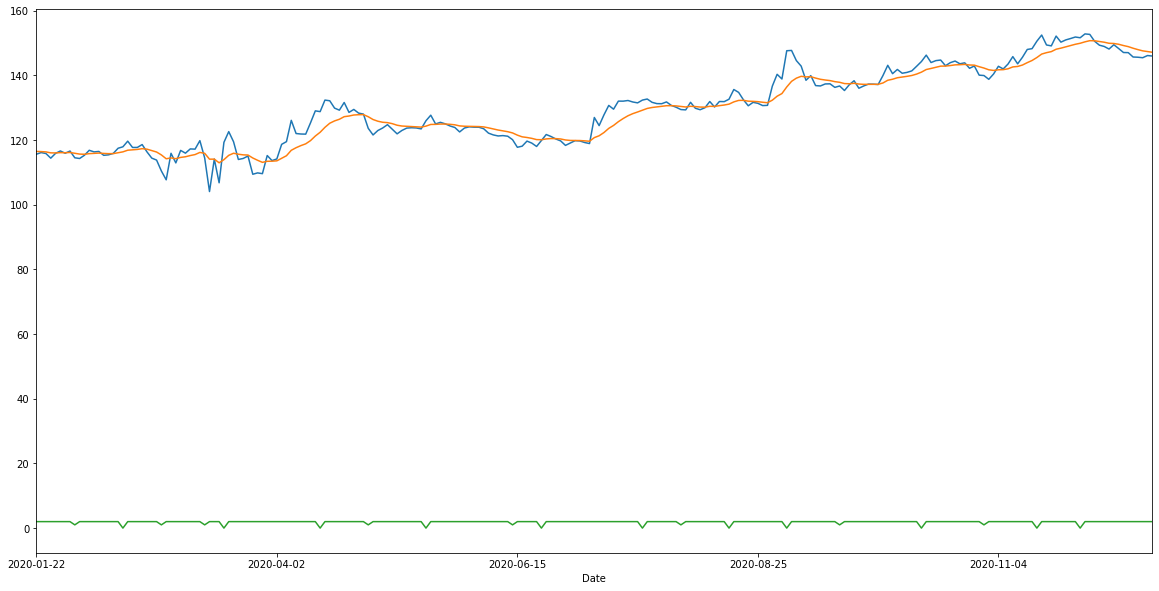

In [77]:
df['previous_1d'].plot(figsize=(20,10),x='Date', y='Close')
df['EMA_12'].plot(figsize=(20,10),x='Date', y='EMA')
df['labels'].plot(figsize=(20,10),x='Date', y='labels')

In [78]:
df.to_csv('mark up phase data/test_acc_data.csv')